In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = '/content/drive/Othercomputers/My laptop/100-Days-Of-DL/RNN/02-SentimentAnalysisUsingRNN'

# Load dataset
The dataset is already tokenized and integer encoded <br>
But the dataset is not padded

In [3]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.datasets import imdb

In [4]:
(x, y), (x_test, y_test) = imdb.load_data()

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Apply Padding

In [5]:
from tensorflow.keras.utils import pad_sequences

x = pad_sequences(x, padding='post')
x_test = pad_sequences(x_test, padding='post')

In [6]:
x.shape

(25000, 2494)

In [7]:
x_test.shape

(25000, 2315)

# Create model

In [8]:
from keras import Sequential
from keras.layers import *

In [9]:
model = Sequential(name='input_layer')
model.add(SimpleRNN(units=100, input_shape=(x.shape[1],1), return_sequences=False))
model.add(Dense(units=1, activation='sigmoid', name='output_layer'))
model.name = 'rnn_sentiment_analysis_integer_encoding.keras'
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "rnn_sentiment_analysis_integer_encoding.keras"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 100)            │        10,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,301 (40.24 KB)

 Trainable params: 10,301 (40.24 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(x, y, validation_data=(x_test, y_test), epochs=10).history

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 152s 190ms/step - accuracy: 0.5047 - loss: 0.7000 - val_accuracy: 0.4974 - val_loss: 0.6978
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 206s 196ms/step - accuracy: 0.4969 - loss: 0.6956 - val_accuracy: 0.4995 - val_loss: 0.6935
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 202s 196ms/step - accuracy: 0.5040 - loss: 0.6960 - val_accuracy: 0.5029 - val_loss: 0.6933
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 202s 195ms/step - accuracy: 0.4939 - loss: 0.6959 - val_accuracy: 0.5027 - val_loss: 0.6973
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 202s 196ms/step - accuracy: 0.5002 - loss: 0.6951 - val_accuracy: 0.4975 - val_loss: 0.6955
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 202s 196ms/step - accuracy: 0.5045 - loss: 0.6950 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 196s 188ms/step - accuracy: 0.4988 - loss: 0.6959 - val_accuracy: 0.4977 - val_loss: 0.6941
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 208s 195ms/step - accuracy: 0.4974 -

# Evaluate model performance

In [12]:
import matplotlib.pyplot as plt

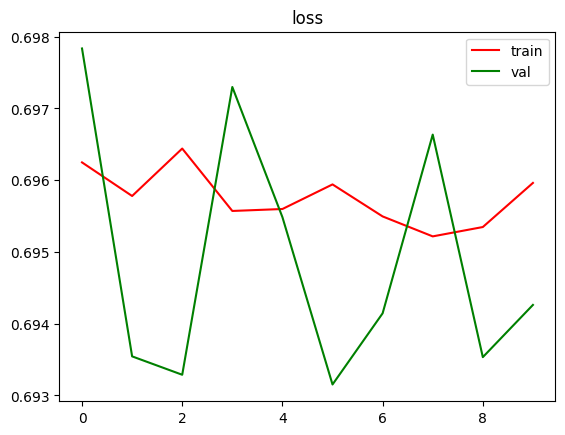

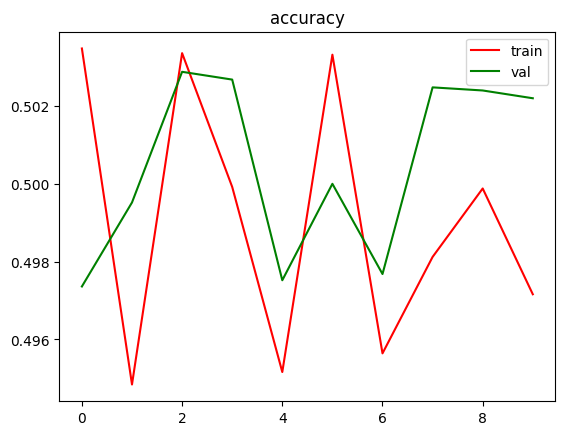

<Figure size 640x480 with 0 Axes>

In [13]:
plt.plot(history['loss'], label='train', color='red')
plt.plot(history['val_loss'], label='val', color='green')
plt.title('loss')
plt.legend()
plt.show()
plt.savefig(f"{path}/loss.png")

plt.plot(history['accuracy'], label='train', color='red')
plt.plot(history['val_accuracy'], label='val', color='green')
plt.title('accuracy')
plt.legend()
plt.show()
plt.savefig(f"{path}/accuracy.png")

In [14]:
model.save(f"{path}/{model.name}")

# Load the trained model and get predictions